In [1]:
import pandas as pd

arquivo = pd.read_csv("PDA_Dados_Cursos_Graduacao_Brasil.csv")
display(arquivo.head(4))


,CODIGO_IES,NOME_IES,CATEGORIA_ADMINISTRATIVA,ORGANIZACAO_ACADEMICA,CODIGO_CURSO,NOME_CURSO,GRAU,AREA_OCDE,MODALIDADE,SITUACAO_CURSO,QT_VAGAS_AUTORIZADAS,CARGA_HORARIA,CODIGO_AREA_OCDE_CINE,AREA_OCDE_CINE,CODIGO_MUNICIPIO,MUNICIPIO,UF,REGIAO
0,4751,CENTRO UNIVERSITÁRIO UNIFATECIE,Privada com fins lucrativos,Centro Universitário,1556773,ENGENHARIA AGRONÔMICA,Bacharelado,Agronomia,Educação a Distância,Em atividade,1000,4400,301,Agronomia,3541406,Presidente Prudente,SP,SUDESTE
1,1491,CENTRO UNIVERSITÁRIO INTERNACIONAL,Privada com fins lucrativos,Centro Universitário,1186955,LETRAS,Licenciatura,Formação de professor de língua/literatura ver...,Educação a Distância,Em atividade,3000,3992,58,Formação de professor de língua/literatura ver...,2516201,Sousa,PB,NORDESTE
2,1472,CENTRO UNIVERSITÁRIO LEONARDO DA VINCI,Privada com fins lucrativos,Centro Universitário,99950,GEOGRAFIA,Licenciatura,Formação de professor de geografia,Educação a Distância,Em atividade,7620,3500,39,Formação de professor de geografia,2800308,Aracaju,SE,NORDESTE
3,221,UNIVERSIDADE CRUZEIRO DO SUL,Privada com fins lucrativos,Universidade,1467998,EDUCAÇÃO FÍSICA,Bacharelado,Educação física,Educação a Distância,Em atividade,1200,3200,328,Educação física,4113205,Lapa,PR,SUL


In [2]:
qtd_cursos = arquivo[["NOME_CURSO", "REGIAO", 'QT_VAGAS_AUTORIZADAS']].groupby(["NOME_CURSO", "REGIAO"]).sum()

final = qtd_cursos.query('QT_VAGAS_AUTORIZADAS != 0')

display(final.head(15))

QT_VAGAS_AUTORIZADAS
NOME_CURSO                                         REGIAO                            
ABI - ARTES VISUAIS                                SUDESTE                          1
ABI - CIÊNCIAS BIOLÓGICAS                          CENTRO-OESTE                    40
                                                   SUDESTE                         82
ABI - CIÊNCIAS DA ATIVIDADE FÍSICA                 SUDESTE                         60
ABI - CIÊNCIAS DA NATUREZA                         SUDESTE                         40
ABI - CIÊNCIAS DA NATUREZA: CIÊNCIAS E BIOLOGIA... SUDESTE                         80
ABI - CIÊNCIAS SOCIAIS                             SUDESTE                          1
ABI - CIêNCIAS SOCIAIS                             SUDESTE                          1
ABI - CONSTRUÇÃO CIVIL                             SUDESTE                         40
ABI - DESIGN                                       SUDESTE                          1
ABI - EDUCAÇÃO FÍSICA                              SUDESTE                          1
ABI - ENGENHARIA                                   SUDESTE                        120
ABI - ENGENHARIA ELÉTRICA                          SUDESTE                          2
ABI - FILOSOFIA                                    SUDESTE                         37
ABI - FÍSICA                                       SUL                             60

In [3]:
df = pd.DataFrame(arquivo)

regiao = df[df['REGIAO'] == 'NORDESTE']

cursos = regiao[["NOME_CURSO", "REGIAO", "QT_VAGAS_AUTORIZADAS"]].groupby(["NOME_CURSO", "REGIAO"]).sum()

ativos = cursos.query('QT_VAGAS_AUTORIZADAS != 0')

display(ativos)

,,QT_VAGAS_AUTORIZADAS
NOME_CURSO,REGIAO,
ACONSELHAMENTO TUTELAR PARA INFÂNCIA E ADOLESCÊNCIA,NORDESTE,178500
ACUPUNTURA,NORDESTE,400
ADMINISTRAÇÃO,NORDESTE,46007957
ADMINISTRAÇÃO DE EMPRESAS,NORDESTE,440
ADMINISTRAÇÃO HOSPITALAR,NORDESTE,200
...,...,...
VISAGISMO E TERAPIAS CAPILARES,NORDESTE,300
VITICULTURA E ENOLOGIA,NORDESTE,490
WEB DESIGNER,NORDESTE,40


In [4]:
courses_offered = arquivo[(arquivo != 'Em extinção') & (arquivo != 'Extinto')].value_counts(subset=['NOME_CURSO'])
university = courses_offered[:5]
university

NOME_CURSO                
ADMINISTRAÇÃO                 22997
PEDAGOGIA                     22587
EDUCAÇÃO FÍSICA               18852
CIÊNCIAS CONTÁBEIS            17545
GESTÃO DE RECURSOS HUMANOS    16328
Name: count, dtype: int64

In [5]:
tabela_qto_courses = {}
nova_tabela_qtd = pd.DataFrame(tabela_qto_courses)

for x in range(len(university)):
    qto_uni_est = university.iloc[x]
    nova_linha_u = pd.DataFrame({ 'Total de cursos ofertados': [qto_uni_est] }, index=[x])
    nova_tabela_qtd = pd.concat([nova_tabela_qtd, nova_linha_u])
    
nova_tabela_qtd.insert(loc=0, column='Cursos', value=['ADMINISTRAÇÃO', 'PEDAGOGIA', 'EDUCAÇÃO FÍSICA', 'CIÊNCIAS CONTÁBEIS', 'GESTÃO DE RECURSOS HUMANOS'])
nova_tabela_qtd

,Cursos,Total de cursos ofertados
0,ADMINISTRAÇÃO,22997
1,PEDAGOGIA,22587
2,EDUCAÇÃO FÍSICA,18852
3,CIÊNCIAS CONTÁBEIS,17545
4,GESTÃO DE RECURSOS HUMANOS,16328


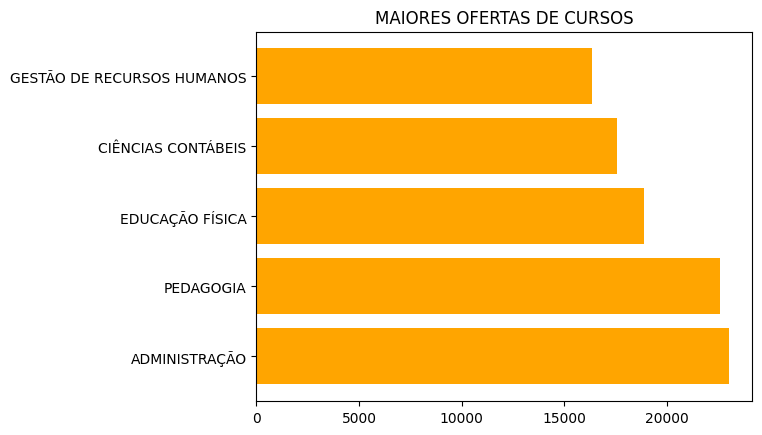

In [6]:
import matplotlib.pyplot as plt

course = nova_tabela_qtd['Cursos']
qtd = nova_tabela_qtd['Total de cursos ofertados']
plt.title("MAIORES OFERTAS DE CURSOS")
plt.barh(course, qtd, color='orange', height=0.8)
plt.savefig("grafico_02.png", dpi = 70, bbox_inches='tight')
plt.show()

In [7]:
tabela_comparativa_regiao = arquivo.groupby('REGIAO')['NOME_CURSO'].nunique().reset_index()

tabela_comparativa_regiao.columns = ['Região', 'Quantidade de Instituições']

print(tabela_comparativa_regiao)

              Região  Quantidade de Instituições
0       CENTRO-OESTE                         723
1  IGNORADO/EXTERIOR                         191
2           NORDESTE                         853
3              NORTE                         598
4            SUDESTE                        1469
5                SUL                        1028


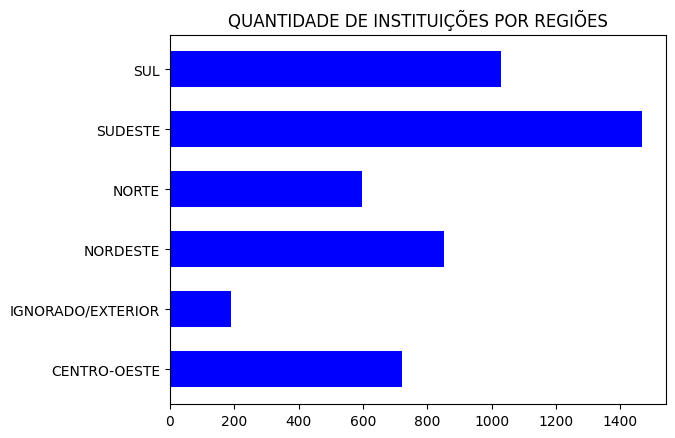

In [8]:
import matplotlib.pyplot as plt

course = tabela_comparativa_regiao['Região']
qtd = tabela_comparativa_regiao['Quantidade de Instituições']
plt.title("QUANTIDADE DE INSTITUIÇÕES POR REGIÕES")
plt.barh(course, qtd, color='blue', height=0.6)
plt.savefig("grafico_03.png", dpi = 80, bbox_inches='tight')
plt.show()

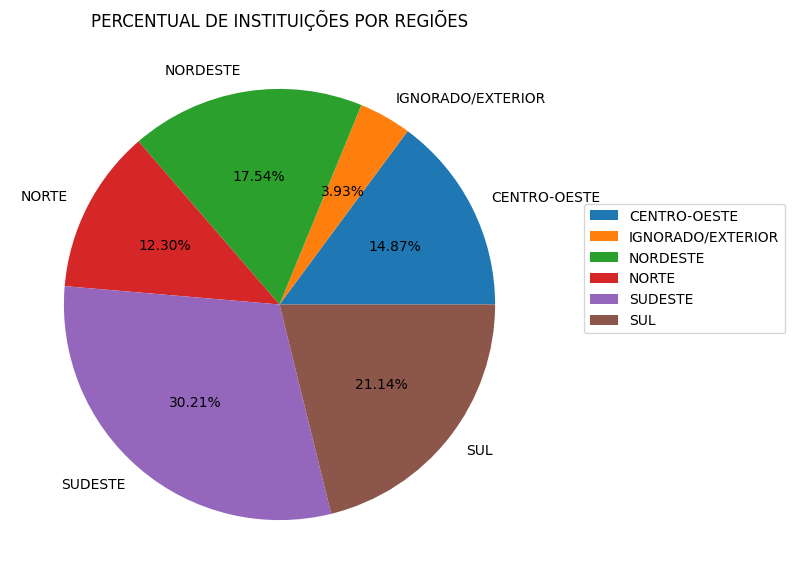

In [9]:
fig, ax = plt.subplots(figsize =(8, 7)) 

plt.title("PERCENTUAL DE INSTITUIÇÕES POR REGIÕES")
plt.pie(qtd, labels=course, autopct="%1.2f%%")

plt.legend(bbox_to_anchor=(1.45, 0.7))
plt.savefig("grafico_03.png")
plt.show()

In [155]:
from fpdf import FPDF

class PDF(FPDF):

    def doc_title_capa(self, text):
        self.set_font("helvetica", "B",17)
        self.multi_cell(0, 7, text, align= "C")

    def doc_subtitle_capa(self, text):
        self.set_font("helvetica", "B",20)
        self.multi_cell(0, 210, text, align= "C")

    def doc_subtitle_capa_desenvolvido(self, text):
        self.set_font("helvetica", "B",14)
        self.multi_cell(0, 49, text, align= "C")

    def doc_title(self, text):
        self.set_font("helvetica", "B",18)
        self.multi_cell(0, 35, text, align= "C")
    
    def doc_text(self, text):
        self.set_font("helvetica", "",12)
        self.multi_cell(0, 7, text)
        self.ln()
    
    def doc_image(self, img, x, y, w, h):
        self.image(img, x, y, w, h)

   

pdf = PDF()
#CAPA DO RELATÓRIO
pdf.add_page()
pdf.doc_title_capa("Relatório da Kick - 2023")
pdf.doc_subtitle_capa("Desigualdade na educação brasileira")
pdf.doc_subtitle_capa_desenvolvido("Desenvolvido por Aninha :) - 2023")


pdf.add_page()
pdf.doc_title("Acesso à educação no Brasil")
pdf.doc_image("educação-aa.png", 35, 40, (420/3.3), (470/6))
pdf.ln(80)
pdf.doc_text(f"\nA desigualdade na educação brasileira é um problema complexo e persistente que tem impactos significativos na sociedade. Ela se manifesta em várias dimensões, incluindo acesso, qualidade e resultados educacionais. Existem vários pontos relacionados á desigualdade na educação brasileira, dentre elas podemos destacar a Desigualdade no Acesso ao Ensino Superior, onde muitos estudantes de familia de baixa renda não tem recursos para pagar uma educação superior de qualidade, e as universidades publicas, embora de alta qualidade, tem vagas limitadas ")
pdf.doc_text("A desigualdade na educação entre as diferentes regiões do Brasil é um problema persistente e complexo. O país possui uma extensa diversidade regional, e essa disparidade se reflete nas condições de acesso e qualidade da educação em cada área.")



pdf.add_page()

pdf.doc_image("grafico_03.png", 18, 15, (640/4), (480/4))
pdf.ln(130)
pdf.doc_text("Ao analisarmos o gráfico acima percebemos que:")
pdf.doc_text("As regiões Norte, Nordeste e centro-oeste, apresentam o menor índice de escolaridade e a região que concentra o maior índice de acesso aos estudos é a região sudeste. Algumas das principais questões relacionadas á desigualde na educação no Brasil por região é")
pdf.doc_text("1. Disparidade de recursos financeiros: As regiões mais ricas, como o Sudeste e o Sul, tendem a ter mais recursos financeiros disponíveis para investir na educação. Isso deve em parte à distribuição desigual de riqueza e à concentração de empresas e setores nessas áreas. Enquanto isso, regiões mais pobres, como o Norte e o Nordeste, têm menos recursos disponíveis para investir em infraestrutura escolar, capacitação de professores e programas educacionais.")
pdf.doc_text("2. Qualidade da infraestrutura escolar: Escolas nas regiões mais ricas possuem melhor infraestrutura, incluindo salas de aula bem equipadas, bibliotecas, laboratórios e acesso à tecnologia. Nas regiões mais pobres, muitas escolas enfrentam carências nessas áreas, tornando o ambiente de aprendizagem menos propício.")
pdf.doc_text("3. Qualificação de professores: As regiões mais ricas exigem a atração de professores mais estruturais devido as condições de trabalho. Em contrapartida, regiões mais pobres, muitas vezes dificultam a retenção e alocação de professores bem preparados.")
pdf.doc_text("4. Acesso à educação: Em áreas rurais e remotas, principalmente nas regiões Norte e Nordeste, o acesso à educação é mais limitado devido à falta de escolas e transporte precário. Isso pode resultar em altas taxas de evasão escolar e menor participação na educação formal. ")
pdf.ln(18)
pdf.doc_title("CONCLUSÃO")
pdf.doc_text("O governo brasileiro tem implementado políticas para tentar reduzir a desigualdade na educação, como o Fundo de Manutenção e Desenvolvimento da Educação Básica (FUNDEB) e programas de transferência de renda. No entanto, essas políticas nem sempre conseguem superar totalmente as disparidades regionais. É importante destacar que a desigualdade na educação não se limita apenas às diferenças regionais, mas também está ligada a fatores socioeconômicos, raciais e culturais. Sabemos que é necessário um esforço conjunto do governo, das instituições educacionais e da sociedade civil para criar um sistema educacional mais equitativo e inclusivo em todo o país.")
pdf.output("Desigualde_na_educação.pdf")

''